In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('./data/train.csv')
X_test = pd.read_csv('./data/test.csv')
X_train.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
X_test.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
X_train.columns
X_train  = X_train.drop('Unnamed: 0',axis=1)
X_test = X_test.drop('Unnamed: 0',axis=1)

In [5]:
X_test.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
X_train.columns = X_train.columns.str.replace(' ','_').str.lower()
X_test.columns = X_test.columns.str.replace(' ','_').str.lower()

X_train.isna().sum()
X_test.isna().sum()

id                                    0
gender                                0
customer_type                         0
age                                   0
type_of_travel                        0
class                                 0
flight_distance                       0
inflight_wifi_service                 0
departure/arrival_time_convenient     0
ease_of_online_booking                0
gate_location                         0
food_and_drink                        0
online_boarding                       0
seat_comfort                          0
inflight_entertainment                0
on-board_service                      0
leg_room_service                      0
baggage_handling                      0
checkin_service                       0
inflight_service                      0
cleanliness                           0
departure_delay_in_minutes            0
arrival_delay_in_minutes             83
satisfaction                          0
dtype: int64

In [7]:
X_train['arrival_delay_in_minutes'].describe()
X_train['arrival_delay_in_minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: arrival_delay_in_minutes, dtype: float64

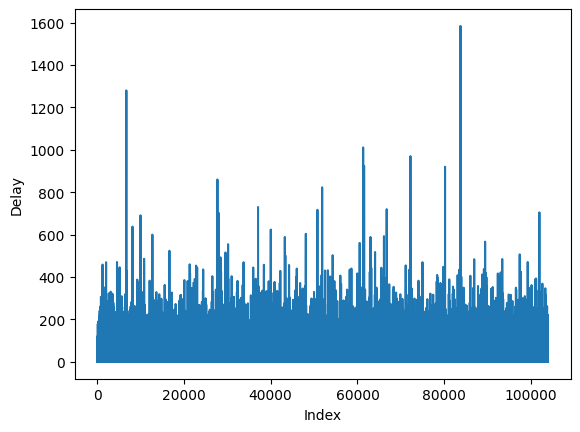

In [8]:
plt.plot(X_train.index,X_train['arrival_delay_in_minutes'])
plt.xlabel("Index")
plt.ylabel("Delay")
plt.show()

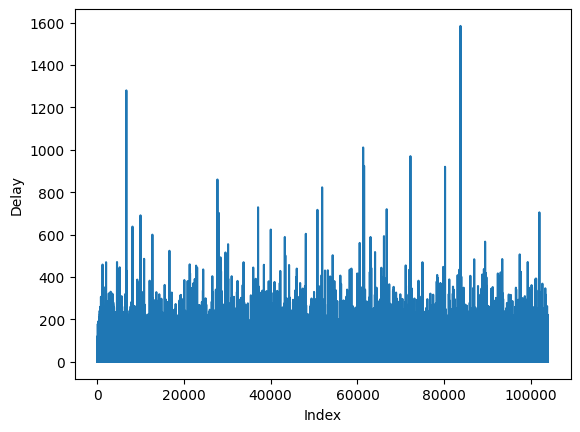

In [9]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

plt.plot(X_train.index,X_train['arrival_delay_in_minutes'])
plt.xlabel("Index")
plt.ylabel("Delay")
plt.show()


In [10]:
X_train.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
categorical = X_train.select_dtypes(include='object').columns

In [12]:
categorical

Index(['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction'], dtype='object')

In [13]:
for col in categorical:
    X_train[col] = X_train[col].str.lower().str.replace(' ','_')
    X_test[col] = X_test[col].str.lower().str.replace(' ','_')

In [14]:
X_train.head()


,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,male,loyal_customer,13,personal_travel,eco_plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral_or_dissatisfied
1,5047,male,disloyal_customer,25,business_travel,business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral_or_dissatisfied
2,110028,female,loyal_customer,26,business_travel,business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,female,loyal_customer,25,business_travel,business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral_or_dissatisfied
4,119299,male,loyal_customer,61,business_travel,business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [15]:
# X_train['satisfaction'] = (X_train['satisfaction']=='satisfied').astype(int)
X_train['satisfaction']=(X_train['satisfaction'] == 'satisfied').astype(int)
X_test['satisfaction']=(X_test['satisfaction'] == 'satisfied').astype(int)

X_train['satisfaction']
X_test['satisfaction']

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int64

In [16]:
X_train.head()
X_test.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,19556,female,loyal_customer,52,business_travel,eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,female,loyal_customer,36,business_travel,business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,male,disloyal_customer,20,business_travel,eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,male,loyal_customer,44,business_travel,business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,female,loyal_customer,49,business_travel,eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1


In [17]:
y_train = X_train['satisfaction']
y_test = X_test['satisfaction']
X_train = X_train.drop('satisfaction',axis=1)
X_test = X_test.drop('satisfaction',axis=1)

In [19]:
X_train.head()
X_test.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,19556,female,loyal_customer,52,business_travel,eco,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,90035,female,loyal_customer,36,business_travel,business,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,12360,male,disloyal_customer,20,business_travel,eco,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,77959,male,loyal_customer,44,business_travel,business,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,36875,female,loyal_customer,49,business_travel,eco,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0


In [20]:
from sklearn.feature_extraction import DictVectorizer


In [21]:
dict_train = X_train.to_dict(orient='records')
dict_test = X_test.to_dict(orient='records')

In [22]:
dv = DictVectorizer(sparse = False)
X_train_enc = dv.fit_transform(dict_train)
X_test_enc = dv.fit_transform(dict_test)

In [23]:
dv.get_feature_names_out()

array(['age', 'arrival_delay_in_minutes', 'baggage_handling',
       'checkin_service', 'class=business', 'class=eco', 'class=eco_plus',
       'cleanliness', 'customer_type=disloyal_customer',
       'customer_type=loyal_customer',
       'departure/arrival_time_convenient', 'departure_delay_in_minutes',
       'ease_of_online_booking', 'flight_distance', 'food_and_drink',
       'gate_location', 'gender=female', 'gender=male', 'id',
       'inflight_entertainment', 'inflight_service',
       'inflight_wifi_service', 'leg_room_service', 'on-board_service',
       'online_boarding', 'seat_comfort',
       'type_of_travel=business_travel', 'type_of_travel=personal_travel'],
      dtype=object)

In [24]:
from sklearn.linear_model import LogisticRegression


In [26]:
lr = LogisticRegression(random_state=0)

In [28]:
lr.fit(X_train_enc, y_train)

/home/aaditya-pareek/myenvs/jupyterenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [31]:
y_pred = lr.predict(X_test_enc)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [32]:
acc = accuracy_score(y_test,y_pred)
acc

0.685786880197105

In [33]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[9922, 4651],
       [3511, 7892]])

In [34]:
f1_score = f1_score(y_test,y_pred)
f1_score

0.6591497536122943